**02**
Use a library routine and one of your own
design, to find a minimum of each of the following functions on the interval $[0, 3]$. Draw
a plot of each function to confirm that it is
unimodal.

* (a) $f(x) = x^4 − 14x^3 + 60x^2 − 70x.$
* (b) $f(x) = 0.5x^2 − \sin(x)$.
* (c) $f(x) = x^2 + 4 \cos(x)$.
* (d) $f(x) = Γ(x)$. (The gamma function, defined by
$$Γ(x) = \int^∞_0 t^{x−1}e^{−t}dt,\ \ \ x > 0,$$
is a built-in function on many computer systems.)


In [ ]:
import math

In [ ]:
from scipy.optimize import golden



---



#  (a) $f(x) = x^4 − 14x^3 + 60x^2 − 70x.$

**scipy.optimize.golden(func, args=(), brack=None,tol=1.4901161193847656e-08, full_output=0, maxiter=5000)** возвращает минимум функции одной переменной с помощью метода золотого сечения.

Учитывая функцию **func** одной переменной и возможный интервал скобок, можно получить минимум функции с точностью **tol**.

## **Метод золотого сечения** - метод одномерной оптимизации.

При построении процесса оптимизации стараются сократить объем вычислений и время поиска. Этого достигают обычно путем сокращения количества вычислений значений функции f(x). Одним из наиболее эффективных методов, в которых при ограниченном количестве вычислений f(x) достигается наилучшая точность, является метод золотого сечения.
Если известно, что функция f(x) унимодальная на отрезке [a,b], то положение точки минимума можно уточнить, вычислив f(x) в двух внутренних точках отрезка.

При этом возможны две ситуации:


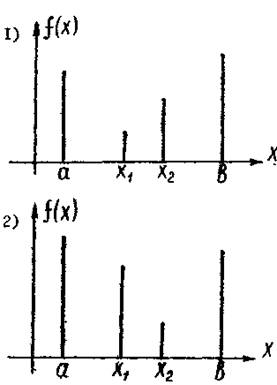

1) f(x1)<f(x2)
Минимум реализуется на отрезке [a, x2].

2) f(x1)>f(x2)
Минимум реализуется на отрезке [x1, b].


В методе золотого сечения каждая из точек x1 и x2 делит исходный интервал на две части так, что отношение целого к большей части равно отношении большей части к меньшей, т.е. равно так называемому "золотому отношению". Это соответствует следующему простому геометрическому представлению:

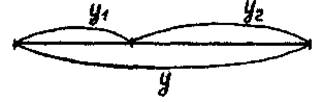

Здесь

$\frac{y}{y_{2}}=\frac{y_{2}}{y_{1}}$

или

$\frac{y}{y-y_{1}}=\frac{y-y_{1}}{y_{1}}$

Обозначим $\frac{y_{1}}{y}=z$

Получим
$\frac{1}{1-z}=\frac{1-z}{z}$

$z=\frac{3-\sqrt{5}}{2}\approx 0,382$

Итак, длины отрезков [a,x1] и [x2,b] одинаковы и составляют 0,382 от длины (a,b). Значениям f(x1) и f(x2) определяется новей интервал (a,x2) или (x1,b) , в котором локализован минимум. Найденный интервал снова делится двумя точками в том же отношении, причем одна из новых точек деления совпадает с уже использованной на предыдущем шаге.


Взаимное расположение точек первых трех вычислений можно показать следующим образом:

1) f(x1)<f(x2)

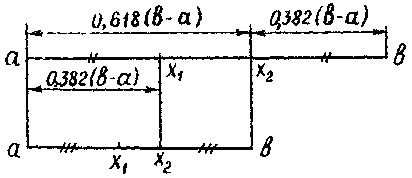

2) f(x1)≥f(x2)

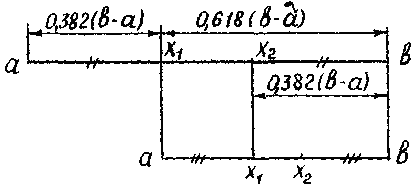

Таким образом, длина интервала неопределенности на каждом шаге сжимается с коэффициентом 0,618. На первом шаге необходимы два вычисления функции, на каждом последующем - одно.

**Алгоритм метода золотого сечения для минимизации функции f(x)** складывается из следующих этапов:

1) Вычисляется значение функции f(x1), где x1=a+0,382(b-a).

2) Вычисляется значение функции f(x2), где x1=b+0,382(b-a).

3) Определяется новый интервал (a,x2) или (x1,b), в котором локализован минимум.

4) Внутри полученного интервала находится новая точка (x1 в случае 1) или (x2 в случае 2), отстоящая от его конца на расстоянии, составляющем 0,382 от его длины.

5) В этой точке рассчитывается значение f(x).

6) Затем вычисления повторяются, начиная с пункта 3, до тех пор, пока величина интервала неопределенности станет меньше или равна ε, где ε - заданное сколь угодно малое положительное число.

In [ ]:
def f(x):
    return (x**4 - 14*(x**3) + 60*(x**2) - 70*x)
golden(f, brack=(0, 3), full_output=True)

(0.7808840395440602, -24.369601567355033, 46)

(<значения аргумента функции в точке минимума>,
 <значение самой функции в точке минимума>,
 <число итераций понадобившихся для нахождения минимума>)

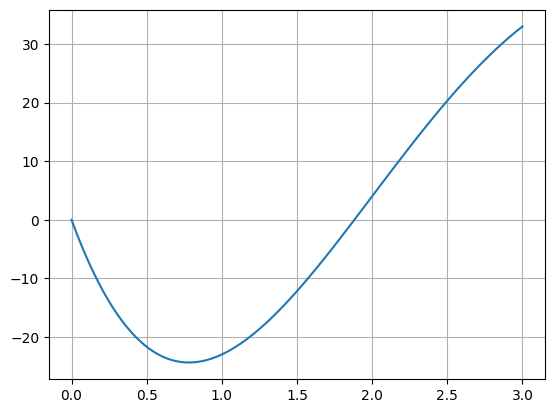

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# функция
y = lambda x: (x**4 - 14*(x**3) + 60*(x**2) - 70*x)
# создаём рисунок с координатную плоскость
fig = plt.subplots()
# создаём область, в которой будет
# - отображаться график
x = np.linspace(0, 3, 100)
# значения x, которые будут отображены
# количество элементов в созданном массиве
# - качество прорисовки графика
# рисуем график
plt.plot(x, y(x))
plt.grid()
# показываем график
plt.show()




---



# (b) $f(x) = 0.5x^2 − \sin(x)$.

In [ ]:
def f(x):
    return 0.5*(x**2) - math.sin(x)
golden(f, brack=(0, 3), full_output=True)

(0.739085141635063, -0.40048861211337894, 47)

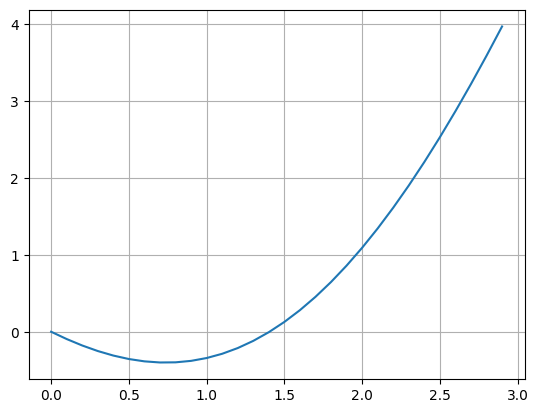

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# функция
def f(x):
    return 0.5*(x**2) - math.sin(x)
x = [ii/10 for ii in range(0, 30)]
y = [f(ii) for ii in x]

plt.plot(x, y)
plt.grid()



---



# (c) $f(x) = x^2 + 4 \cos(x)$.

# minimize()

Выбрать метод нужно самостоятельно с помощью аргумента функции minimize(..., method="").
Если метод не указан, то в итоге выбран один из BFGS, L-BFGS-B, SLSQP  в зависимости от того, имеет ли задача какие-либо ограничения или границы.

**Для условной оптимизации функции нескольких переменных доступны реализации следующих методов:**

trust-constr — поиск локального минимума в доверительной области

SLSQP — последовательное квадратичное программирование с ограничениями, ньютоновский метод решения системы Лагранжа

TNC — Truncated Newton Constrained, ограниченное число итераций, подходит для нелинейных функций с большим числом независимых переменных

L-BFGS-B — метод Broyden–Fletcher–Goldfarb–Shanno, реализованный с уменьшенным потреблением памяти за счет частичной загрузки векторов из матрицы Гессе

COBYLA — Constrained Optimization By Linear Approximation, ограниченная оптимизация с линейной аппроксимацией (без вычисления градиента)

И другие


**В зависимости от выбранного метода, по-разному задаются условия и ограничения для решения задачи:**

объектом класса Bounds для методов L-BFGS-B, TNC, SLSQP, trust-constr

списком (min, max) для этих же методов L-BFGS-B, TNC, SLSQP, trust-constr

объектом или списком объектов LinearConstraint, NonlinearConstraint для методов COBYLA, SLSQP, trust-constr

словарем или списком словарей {'type':str, 'fun':callable, 'jac':callable,opt, 'args':sequence,opt} для методов COBYLA, SLSQP


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.3168084197882135
        x: [ 1.895e+00]
      nit: 5
      jac: [ 8.941e-08]
 hess_inv: [[ 3.050e-01]]
     nfev: 12
     njev: 6


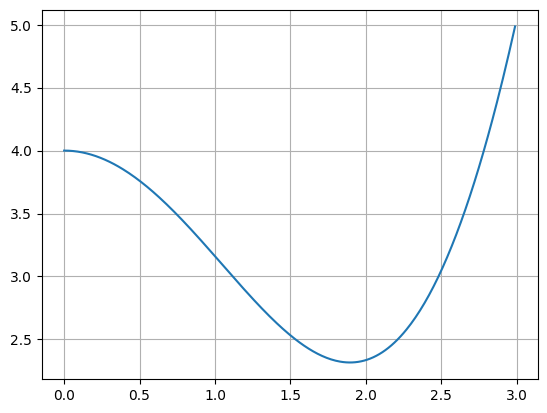

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**2 + 4*np.cos(x))


x = np.arange(0, 3, 0.01)
plt.plot(x, f(x))
plt.grid()

from scipy import optimize

print(optimize.minimize(f, x0=3))

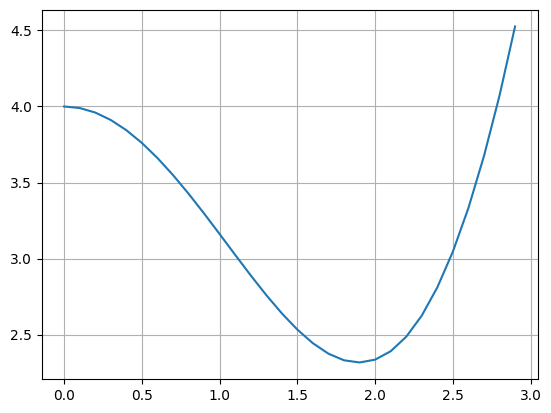

In [ ]:
def f(x):
    return (x**2 + 4*math.cos(x))
x = [ii/10 for ii in range(0, 30)]
y = [f(ii) for ii in x]

plt.plot(x, y)
plt.grid()



---



(d) $f(x) = Γ(x)$. (The gamma function, defined by
$$Γ(x) = \int^∞_0 t^{x−1}e^{−t}dt,\ \ \ x > 0,$$
is a built-in function on many computer systems.)


In [ ]:
from scipy.special import gamma, factorial

In [ ]:
def f(x):
    return gamma(x)
golden(f, brack=(0, 3), full_output=True)

(1.461632151100126, 0.8856031944108886, 45)

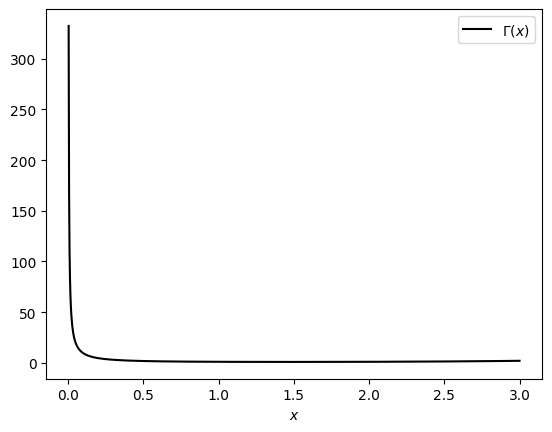

In [ ]:
import numpy as np
from scipy.special import gamma
import pylab


x = pylab.linspace(0, 3, 1000)
pylab.plot(x, gamma(x), ls='-', c='k', label='$\Gamma(x)$')
pylab.xlabel('$x$')
pylab.legend()
pylab.show()
